[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/iuryxavier/curso-python/blob/master/aulas/aula_03_processando_imagem.ipynb)

In [1]:
from skimage import data
from skimage import io

In [2]:
io.cmap = 'gray'

In [3]:
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
image = data.coins()

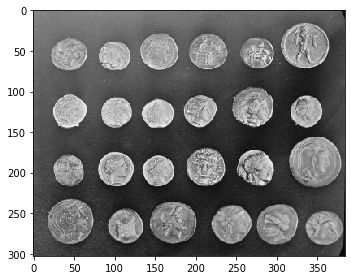

In [5]:
io.imshow(image)

## Filtros de Imagens

In [6]:
from skimage import filters

In [7]:
methods = [fil for fil in dir(filters) if not fil.startswith('_')]

In [8]:
print(methods)

['LPIFilter2D', 'apply_hysteresis_threshold', 'edges', 'frangi', 'gabor', 'gabor_kernel', 'gaussian', 'hessian', 'inverse', 'laplace', 'lpi_filter', 'median', 'meijering', 'prewitt', 'prewitt_h', 'prewitt_v', 'rank', 'rank_order', 'ridges', 'roberts', 'roberts_neg_diag', 'roberts_pos_diag', 'sato', 'scharr', 'scharr_h', 'scharr_v', 'sobel', 'sobel_h', 'sobel_v', 'threshold_isodata', 'threshold_li', 'threshold_local', 'threshold_mean', 'threshold_minimum', 'threshold_niblack', 'threshold_otsu', 'threshold_sauvola', 'threshold_triangle', 'threshold_yen', 'thresholding', 'try_all_threshold', 'unsharp_mask', 'wiener']


In [9]:
filtered = filters.gaussian(image)

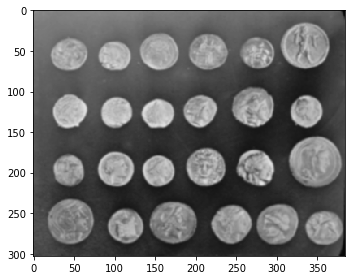

In [10]:
io.imshow(filtered)

In [11]:
filtered = filters.roberts(image)

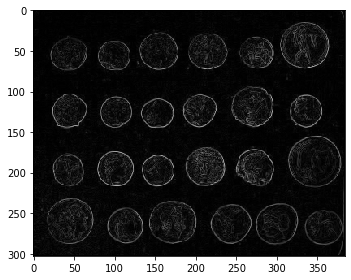

In [12]:
io.imshow(filtered)

## Morfologia Matemática em Imagens

In [13]:
from skimage import morphology

In [14]:
methods = [mor for mor in dir(morphology) if not mor.startswith('_')]

In [15]:
print(methods)

['area_closing', 'area_opening', 'ball', 'binary', 'binary_closing', 'binary_dilation', 'binary_erosion', 'binary_opening', 'black_tophat', 'closing', 'convex_hull', 'convex_hull_image', 'convex_hull_object', 'cube', 'diameter_closing', 'diameter_opening', 'diamond', 'dilation', 'disk', 'erosion', 'extrema', 'flood', 'flood_fill', 'grey', 'greyreconstruct', 'h_maxima', 'h_minima', 'label', 'local_maxima', 'local_minima', 'max_tree', 'max_tree_local_maxima', 'medial_axis', 'misc', 'octagon', 'octahedron', 'opening', 'reconstruction', 'rectangle', 'remove_small_holes', 'remove_small_objects', 'selem', 'skeletonize', 'skeletonize_3d', 'square', 'star', 'thin', 'watershed', 'white_tophat']


In [16]:
selem = morphology.square(width=2)

In [17]:
selem

array([[1, 1],
       [1, 1]], dtype=uint8)

In [18]:
median_selem = filters.median(image, selem)

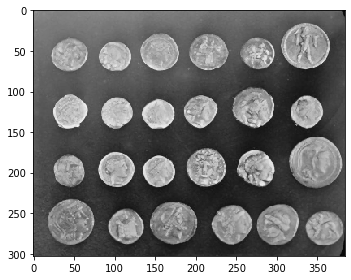

In [19]:
io.imshow(median_selem)

In [20]:
selem = morphology.disk(radius=2)

In [21]:
selem

array([[0, 0, 1, 0, 0],
       [0, 1, 1, 1, 0],
       [1, 1, 1, 1, 1],
       [0, 1, 1, 1, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

In [22]:
median_selem = filters.median(image, selem)

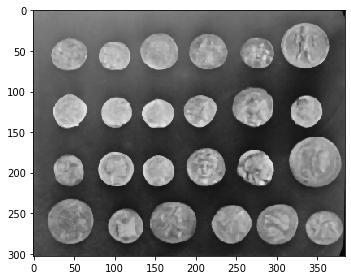

In [23]:
io.imshow(median_selem)

In [24]:
selem = morphology.octagon(2,2)

In [25]:
selem

array([[0, 0, 1, 1, 0, 0],
       [0, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 0],
       [0, 0, 1, 1, 0, 0]], dtype=uint8)

In [26]:
median_selem = filters.median(image, selem)

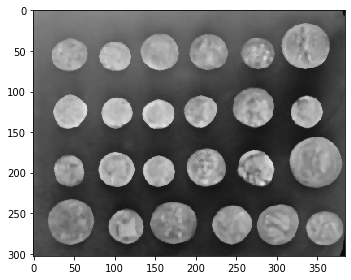

In [27]:
io.imshow(median_selem)

## Limiarização de Imagem

In [35]:
feature = filters.gaussian(image, sigma=1)
feature = filters.median(feature, morphology.disk(3))
feature = filters.median(feature, morphology.disk(5))

In [36]:
cond = feature < feature.max() / 2

In [37]:
feature[cond] = 0

In [38]:
feature[~cond] = 1

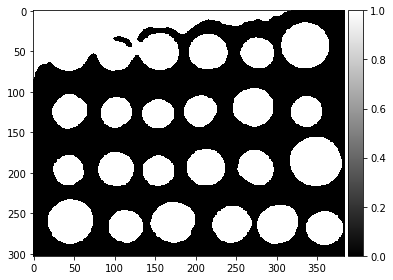

In [39]:
io.imshow(feature, cmap='gray')

In [40]:
feature = filters.gaussian(feature,sigma=1)
feature = filters.roberts(feature)

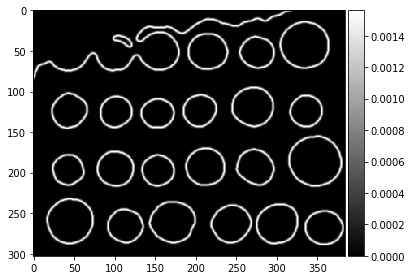

In [41]:
io.imshow(feature, cmap='gray')